/var/folders/b1/_cc_rw596_d_k5kn75f2kpjh0000gn/T/ipykernel_84410/81769845.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])


Relative Alpha Power: 0.975
State: Eyes CLOSED


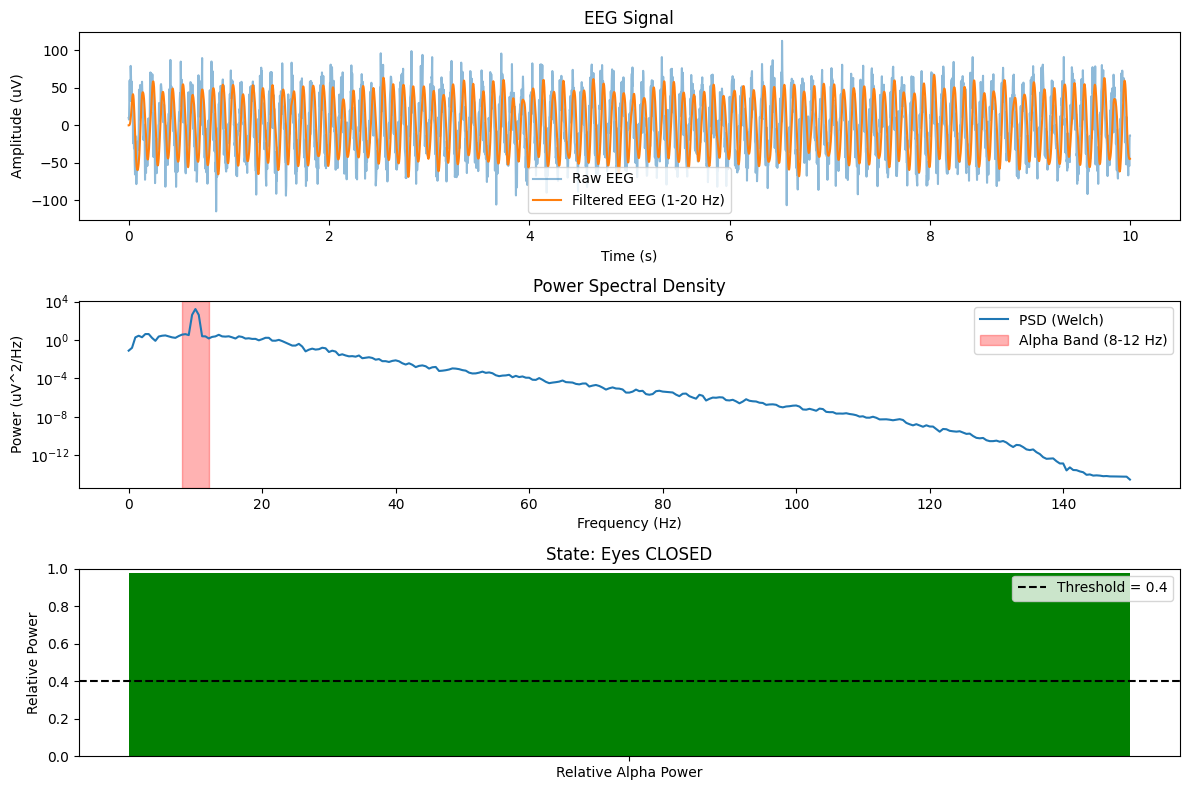

In [ ]:
# EEG Signal Processing Demo: Filtering and PSD Analysis

# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch

# 2. Simulate EEG data (or load real data)
# Let's simulate 10 seconds of EEG-like signal sampled at 300 Hz
fs = 300  # Sampling frequency
t = np.linspace(0, 10, 10 * fs, endpoint=False)

# Simulate a signal with alpha (10 Hz), plus some noise
np.random.seed(42)
alpha_wave = 50 * np.sin(2 * np.pi * 10 * t)  # 10 Hz alpha
noise = 20 * np.random.randn(len(t))
eeg_signal = alpha_wave + noise

# 3. Bandpass filter design (1-20 Hz)
def create_bandpass_filter(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, b, a):
    return lfilter(b, a, data)

# Create and apply the filter
b_bandpass, a_bandpass = create_bandpass_filter(1, 20, fs, order=4)
filtered_eeg = apply_bandpass_filter(eeg_signal, b_bandpass, a_bandpass)

# 4. Calculate PSD with Welch's Method
f, psd = welch(filtered_eeg, fs, nperseg=fs*2)  # 2s window

# 5. Compute Relative Alpha Power (8-12 Hz)
def bandpower(psd, freqs, band):
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.trapezoid(psd[idx_band], freqs[idx_band])

total_power = bandpower(psd, f, [1, 20])
alpha_power = bandpower(psd, f, [8, 12])

relative_alpha_power = alpha_power / total_power
print(f"Relative Alpha Power: {relative_alpha_power:.3f}")

# 6. Apply threshold to classify eyes open/closed
THRESHOLD = 0.4
if relative_alpha_power > THRESHOLD:
    state = "Eyes CLOSED"
else:
    state = "Eyes OPEN"

print(f"State: {state}")

# 7. Plot the results
plt.figure(figsize=(12, 8))

# Plot raw and filtered EEG
plt.subplot(3, 1, 1)
plt.plot(t, eeg_signal, label='Raw EEG', alpha=0.5)
plt.plot(t, filtered_eeg, label='Filtered EEG (1-20 Hz)', linewidth=1.5)
plt.title("EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.legend()

# Plot PSD
plt.subplot(3, 1, 2)
plt.semilogy(f, psd, label='PSD (Welch)')
plt.axvspan(8, 12, color='red', alpha=0.3, label='Alpha Band (8-12 Hz)')
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (uV^2/Hz)")
plt.legend()

# Plot relative alpha power and threshold
plt.subplot(3, 1, 3)
plt.bar(['Relative Alpha Power'], [relative_alpha_power], color='green' if state == "Eyes CLOSED" else 'red')
plt.axhline(THRESHOLD, color='black', linestyle='--', label=f'Threshold = {THRESHOLD}')
plt.ylim(0, 1)
plt.title(f"State: {state}")
plt.ylabel("Relative Power")
plt.legend()

plt.tight_layout()
plt.show()
